In [ ]:
import requests as rq #library untuk melakukan request ke suatu website
from bs4 import BeautifulSoup as bs #import beautiful soup library
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import  LinearRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
url = 'https://in.finance.yahoo.com/currencies?guccounter=1'
soup = bs(page.content, 'html.parser')
page = rq.get(url)
f = open('result_currencies.csv', 'w') 
w = csv.writer(f)
w.writerow(('Names','Prices','Change','%Change'))

for link in soup.findAll("tr",{"class": "BdT"}):
  Names = link.find("td",{"class": "data-col1"}).text
  Prices =  link.find("td",{"class": "data-col2"}).text
  Change = link.find("td",{"class": "data-col3"}).text
  percentChange = link.find("td",{"class": "data-col4"}).text
  
  print("Names : ",Names)
  print("Prices : ",Prices)
  print("Change : ",Change)
  print("%Change : ",percentChange)
  print("")

  gabung = Names,Prices,Change,percentChange
  w.writerow(gabung)
  
f.close()

Names :  USD/INR
Prices :  73.4400
Change :  0.0000
%Change :  0.00%

Names :  EUR/INR
Prices :  86.0505
Change :  -0.0312
%Change :  -0.04%

Names :  GBP/INR
Prices :  100.8825
Change :  -0.0047
%Change :  -0.00%

Names :  AED/INR
Prices :  19.9500
Change :  0.0000
%Change :  0.00%

Names :  INR/JPY
Prices :  1.5030
Change :  +0.0034
%Change :  +0.23%

Names :  SGD/INR
Prices :  54.5290
Change :  +0.0390
%Change :  +0.07%

Names :  USD/IDR
Prices :  14,443.0000
Change :  0.0000
%Change :  0.00%

Names :  USD/THB
Prices :  31.3450
Change :  +0.0450
%Change :  +0.14%

Names :  USD/MYR
Prices :  4.1510
Change :  +0.0020
%Change :  +0.05%

Names :  USD/ZAR
Prices :  14.9251
Change :  +0.0235
%Change :  +0.16%

Names :  USD/RUB
Prices :  75.8900
Change :  +0.0186
%Change :  +0.02%

Names :  AUD/USD
Prices :  0.7607
Change :  +0.0011
%Change :  +0.14%

Names :  AUD/JPY
Prices :  84.1450
Change :  +0.3290
%Change :  +0.39%

Names :  NZD/USD
Prices :  0.6985
Change :  -0.0001
%Change :  -0.02

     Names  Change
0  USD/INR  0.0000
1      NaN     NaN
2      NaN     NaN
3  AED/INR  0.0000
4  INR/JPY  0.0034


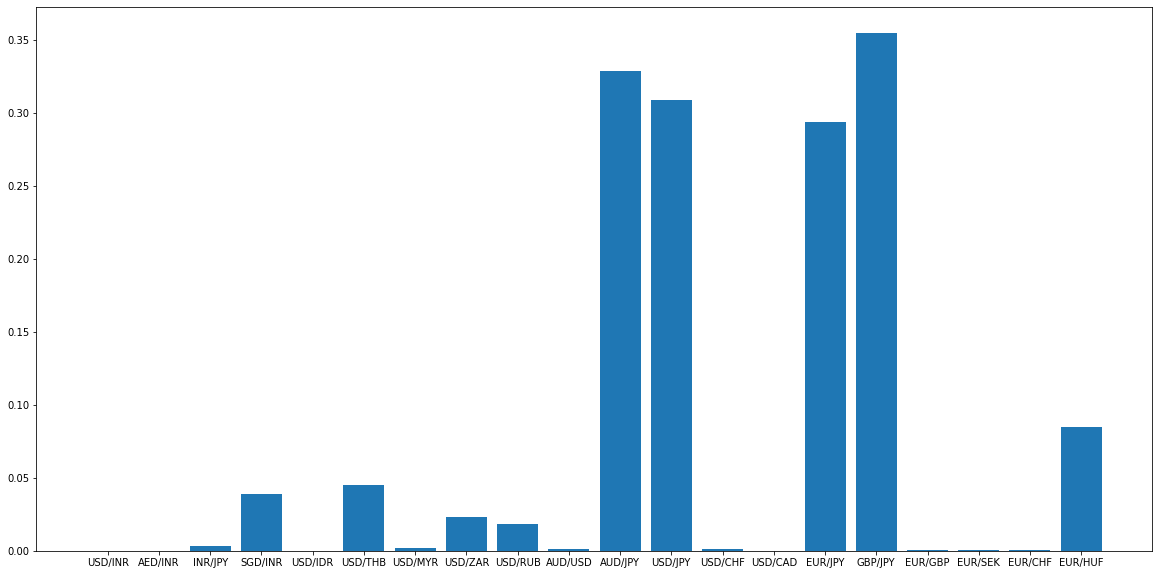

In [ ]:
data_currencies = pd.read_csv('/content/result_currencies.csv')
more_than_0 = data_currencies[['Names','Change']].where(data_currencies['Change']>=0)
print(more_than_0.head())
more_than_0 = more_than_0.dropna()
more_than_0 = more_than_0.reset_index(drop=True)
plt.figure(figsize=(20, 10))
plt.bar(more_than_0['Names'],more_than_0['Change'])
plt.show()

In [ ]:
data_currencies_header = ['Prices', 'Change', '%Change']
data_currencies = pd.DataFrame(data_currencies[['Prices', 'Change', '%Change']], columns=data_currencies_header)
print(data_currencies.head())

X = data_currencies[['Change','%Change']].replace({'%':''}, regex=True)
Y = data_currencies['Prices']

labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

# X = np.array(X).reshape(-1,1)
# Y = np.array(Y).reshape(-1,1)

# Xscaler=MinMaxScaler()
# X = Xscaler.fit_transform(X)

# Yscaler=MinMaxScaler()
# Y = Yscaler.fit_transform(Y)

Xtrain,Xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)


     Prices  Change %Change
0   73.4400  0.0000   0.00%
1   86.0505 -0.0312  -0.04%
2  100.8825 -0.0047  -0.00%
3   19.9500  0.0000   0.00%
4    1.5030  0.0034  +0.23%


In [ ]:
## Multiple Linear

regression = linear_model.LinearRegression()
regression.fit(Xtrain, ytrain)

print('\n')
print('Coefficient:',regression.coef_)
print('Intercept:',regression.intercept_,'\n')

ypred = regression.predict(Xtest)

df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred},index=None)
print(df.head(10))

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))



Coefficient: [21.62535328 -8.21034062]
Intercept: 11.432510045833027 

   Actual  Predicted
0      21  11.701175
1       8  11.905668
2       9   9.617658
3       5  11.909993
4      23  11.670535
5      11  11.330871
Mean Absolute Error: 5.398746567669058
Mean Squared Error: 46.3863574543493
Root Mean Squared Error: 6.810753075420464


In [ ]:
## Polynomial Linear
polyFeat = PolynomialFeatures(degree=2)
xtrain_poly = polyFeat.fit_transform(Xtrain)
xtest_poly = polyFeat.transform(Xtest)

regression = LinearRegression()
regression = linreg.fit(xtrain_poly,ytrain)

print('\n')
print('Coefficient:',regression.coef_)
print('Intercept:',regression.intercept_,'\n')

ypred = regression.predict(xtest_poly)

df = pd.DataFrame({'Actual': ytest, 'Predicted': ypred},index=None)
print(df.head(10))

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))



Coefficient: [   0.           32.9015447   -21.02713549 -276.36244015  396.68055735
  -92.1798313 ]
Intercept: 12.185694267854494 

   Actual  Predicted
0      21  12.207865
1       8  13.107061
2       9   2.892015
3       5  13.108969
4      23  12.392203
5      11  12.024952
Mean Absolute Error: 6.6248165590697985
Mean Squared Error: 53.33707630526033
Root Mean Squared Error: 7.303223692675744


## Evaluasi

Dari hasil percobaan tersebut dapat dilihat bahwa mse terkecil terdapat pada hasil metode Multiple Linear Regression. Maka konsep regression yang paling cocok adalah  Multiple Linear Regression